# Images:
- ***Black and white images*** : These images has only 2 columns , 0 for black and 1 for white. These values are binary values so they are also called as binary images or monochrome images. Extensivly used in medical imaging or they can be part of image processing.
- ***GreyScale Image*** : Here it is a combination of black and white colors upto 256 colors. 0 for black , 128 is grey , 255 is white. Moving from 128 towards 0 adds more black shades and from 128 to 255 there are more white shades. It uses uint-8 datatype.
- ***Color Images*** : It's a combination of red , green and blue color where each color can have value upto 256(0-255) values. So there are approx 16 million combinations.
- ***Synthetic Images*** : These images are generated by computers extensively used in graphics and animation. They use index table to obtain colors. 8 bit , 16bit and 32 bit combinations are used.
- GreyScale and Black/white images are 2D arrays where as color images are 3D array. By default rgb colors are used.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

from warnings import filterwarnings
filterwarnings('ignore') 

In [23]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtrain.shape,ytrain.shape)
print(xtest.shape , ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, '8')

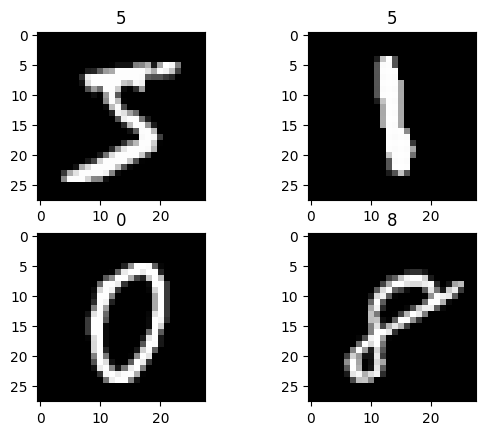

In [24]:
plt.subplot(221); plt.imshow(xtrain[0],cmap='gray');plt.title(ytrain[0])
plt.subplot(222); plt.imshow(xtrain[200],cmap='gray');plt.title(ytrain[100])
plt.subplot(223); plt.imshow(xtrain[1000],cmap='gray');plt.title(ytrain[1000])
plt.subplot(224); plt.imshow(xtrain[59999],cmap='gray');plt.title(ytrain[59999])

In [41]:
#preprocessing images
# as ann can accept only 1d data , reshape images form 2d to 1d
xmtrain = xtrain.reshape((60000,784))
xmtest = xtest.reshape((10000,784))
print(xmtrain.shape, xmtest.shape)
xmtrain = xmtrain/255;
xmtest = xmtest/255;

(60000, 784) (10000, 784)


In [42]:
#encode the label
from keras.utils import to_categorical
ymtrain = to_categorical(ytrain)
ymtest = to_categorical(ytest)

In [43]:
print(ytrain[0:3])
print(ymtrain[0:3])

[5 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [44]:
# now build neural network architecture
ANN_model = Sequential()
ANN_model.add(Dense(input_shape=[784],units=256,activation='relu'))
ANN_model.add(Dense(units=10, activation='sigmoid'))

ANN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
ANN_model.fit(xmtrain,ymtrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2251 - accuracy: 0.9346
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0936 - accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0448 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0324 - accuracy: 0.9898


In [49]:
ANN_model.evaluate(xmtest,ymtest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9762


[0.07493577152490616, 0.9761999845504761]

## Single image Prediction , sample test

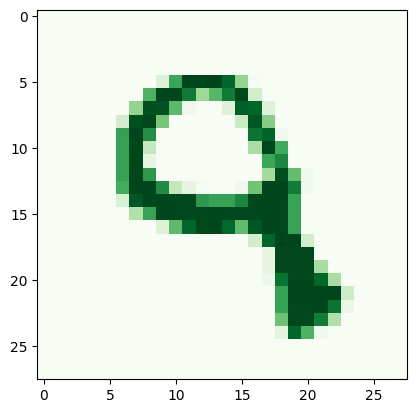

In [50]:
#single image_prediction , sample test
plt.imshow(xtest[4000],cmap='Greens')
plt.show()

In [51]:
r = ANN_model.predict(xmtest[4000:4001])
print("probalities ",r)
print("The digit is :" , np.argmax(r))

1/1 [==============================] - 0s 48ms/step
probalities  [[1.4889108e-07 1.2797650e-05 7.4624870e-04 4.6257439e-01 5.2847046e-01
  1.8677960e-01 9.4957264e-05 5.0923521e-05 9.8072308e-01 9.9748027e-01]]
The digit is : 9


## Model Saving

In [52]:
ANN_model.save('Handwritten_digit_ann_model_best.h5')

In [53]:
ANN_model.save('handwritten_digit_ann_model_best.keras')

In [54]:
xtest[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0